In [1]:
import assignment.load as load
import assignment.display as display
%matplotlib inline

In [2]:
data = load.load_data(load.DEFAULT_PATH)

In [3]:
from assignment.classify import KNearestNeighbour
nn = KNearestNeighbour(data._raw_data['train_data'], data._raw_data['train_labels'], k=1)

In [4]:
import numpy as np

In [5]:
data.wordsearch1.classify(nn)
data.wordsearch2.classify(nn)

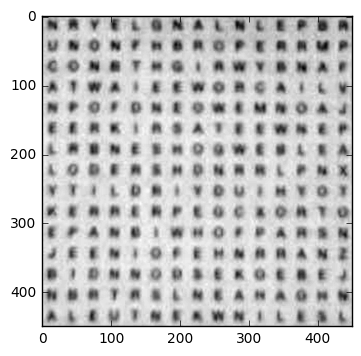

In [6]:
import matplotlib.pyplot as plt
data.wordsearch2.show()

In [7]:
data._raw_data['words']

['barry',
 'beardshaw',
 'bridgeman',
 'brown',
 'cane',
 'crowe',
 'don',
 'fish',
 'flowerdew',
 'hoare',
 'jekyll',
 'jellicoe',
 'kent',
 'langley',
 'nesfield',
 'paine',
 'paxton',
 'peto',
 'repton',
 'robinson',
 'roper',
 'shenstone',
 'vanbrugh',
 'wright']

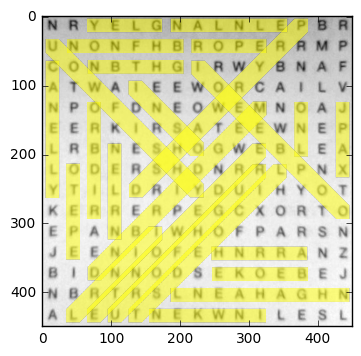

In [13]:
import cProfile
cProfile.run("data.wordsearch1.find_all_and_show(rad=10)", "show_stats_3")

In [9]:
nn.partition_test(200)

(0.965, 7)

In [10]:
confusion_matrix, percentage, misclassified = nn.loo_test()
percentage

0.8497854077253219